# Install Library

In [ ]:
!pip install kagglehub
!pip install tensorflowjs
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install tensorflow
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


# Import Package

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Gathering

In [ ]:
# Download dataset
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print("Path to dataset files:", path)

# Load dataset
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

Path to dataset files: /kaggle/input/sleep-health-and-lifestyle-dataset


In [ ]:
# Display initial data and information
print("Initial data preview:")
df.head()
# print(df.head())

Initial data preview:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
print("\nData information:")
df.info()


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Data Assessing

In [ ]:
# Check for duplicates
print('\nJumlah Data Duplikat : ', df.duplicated().sum())


Jumlah Data Duplikat :  0


In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


# Cleaning Data

In [ ]:
df.drop(columns=['Person ID'], axis=1, inplace=True)

In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.extract(r'(\d+)/(\d+)').astype(int)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [ ]:
def jenisTekananDarah(systolic, diastolic):
    if systolic <= 120 and diastolic <= 80:
        return 'Normal'
    elif 120 < systolic <= 129 and diastolic <= 80:
        return 'Pra Hipertensi'
    elif (130 <= systolic <= 139) or (80 < diastolic < 89):
        return 'Hipertensi Tahap 1'
    else:
        return 'Hipertensi Tahap 2'

In [ ]:
df['BP_Category'] = df.apply(lambda row: jenisTekananDarah(row['Systolic'], row['Diastolic']), axis=1)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP_Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83,Hipertensi Tahap 1
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80,Pra Hipertensi
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80,Pra Hipertensi
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hipertensi Tahap 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hipertensi Tahap 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Hipertensi Tahap 2
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Hipertensi Tahap 2
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Hipertensi Tahap 2
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,Hipertensi Tahap 2


In [ ]:
df.drop(columns=['Blood Pressure', 'Systolic', 'Diastolic'], axis=1, inplace=True)

In [ ]:
df['Sleep Disorder'] = np.where(df['Sleep Disorder'].isna(), 'Normal', df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP_Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Normal,Hipertensi Tahap 1
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,Pra Hipertensi
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Normal,Pra Hipertensi
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hipertensi Tahap 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hipertensi Tahap 2


In [ ]:
# Display updated data
print("\nUpdated data sample:")
print(df.head())


Updated data sample:
  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
2                       60             8       Normal          75   
3                       30             8        Obese          85   
4                       30             8        Obese          85   

   Daily Steps Sleep Disorder         BP_Category  
0         4200         Normal  Hipertensi Tahap 1  
1        10000      

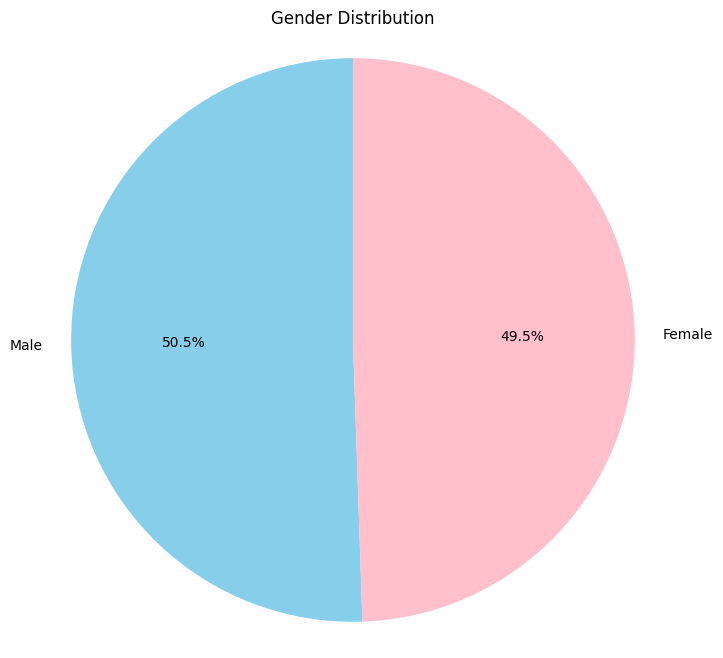

In [ ]:
gender_counts = df['Gender'].value_counts()
gender_percentages = gender_counts / len(df) * 100


plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

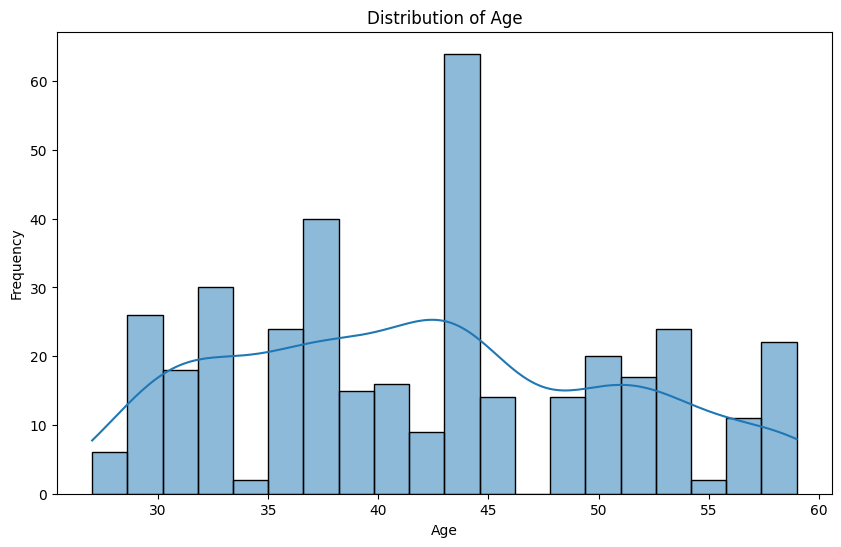

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-acb436fbdc87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Occupation', data=df, palette='viridis')


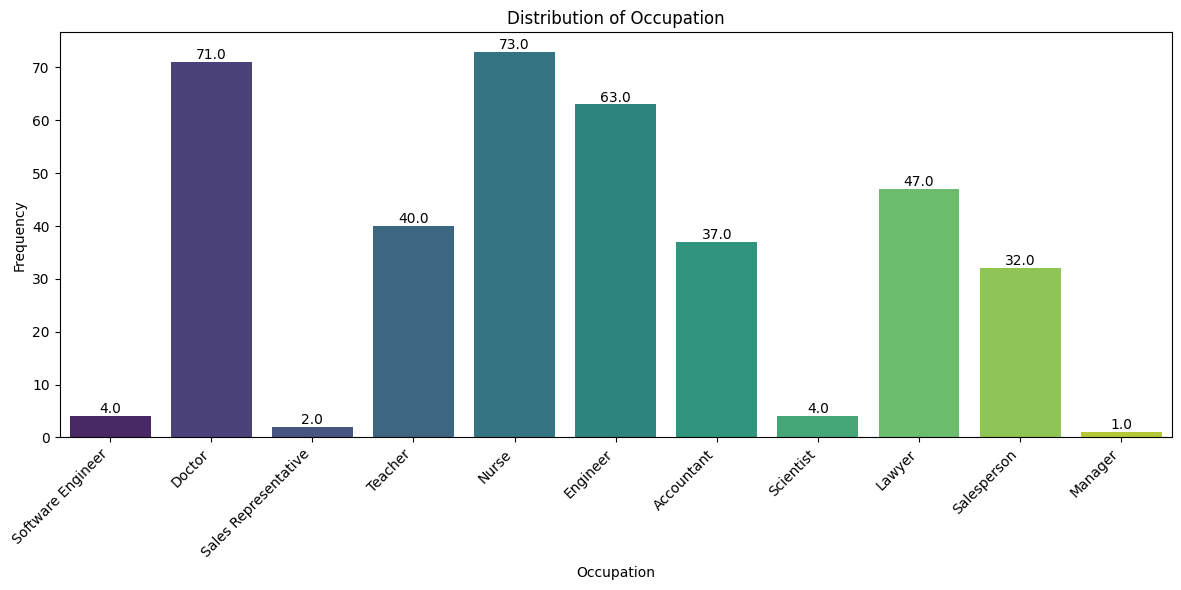

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Occupation', data=df, palette='viridis')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

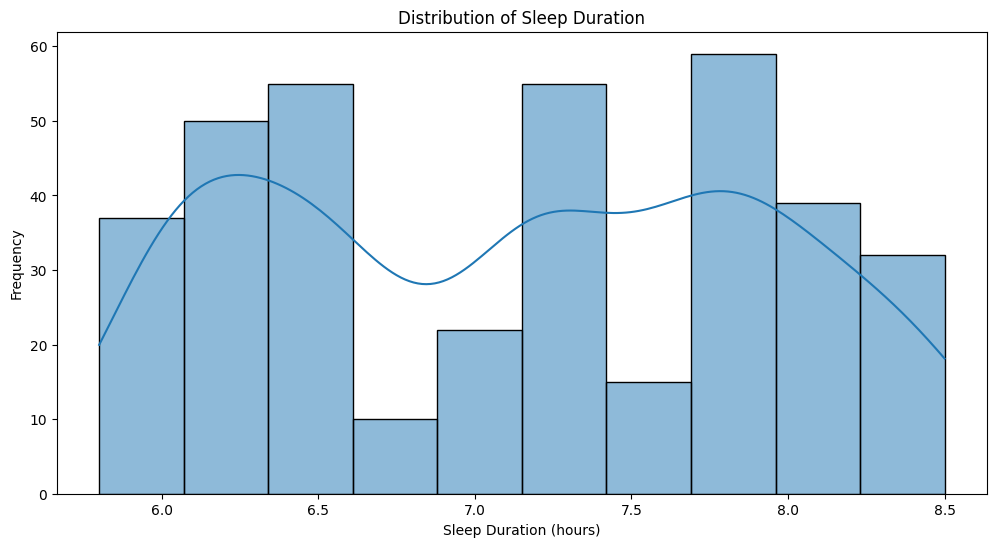

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Grouping columns by data type
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Categorical columns:
['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'BP_Category']


In [ ]:
# Descriptive statistics for numerical variables
numeric_data = df.select_dtypes(include=['float64', 'int64'])
print("\nDescriptive statistics for numerical variables:")
print(numeric_data.describe())


Descriptive statistics for numerical variables:
              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000

# Data Preprocessing

In [ ]:
# Data Encoding
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()
bmi_encoder = LabelEncoder()
bp_encoder = LabelEncoder()


df['Gender'] = gender_encoder.fit_transform(df['Gender'])
df['Occupation'] = occupation_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = bmi_encoder.fit_transform(df['BMI Category'])
df['BP_Category'] = bp_encoder.fit_transform(df['BP_Category'])

df['Sleep Disorder'] = df['Sleep Disorder'].map({'Normal': 0, 'Sleep Apnea': 1, 'Insomnia': 2})

In [ ]:
# Make sure data was encoded
print(df.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             0          75   
2                       60             8             0          75   
3                       30             8             2          85   
4                       30             8             2          85   

   Daily Steps  Sleep Disorder  BP_Category  
0         4200               0            0  
1        10000               0            3  
2        10000               0            3  
3         

In [ ]:
# Split Data Training and Target
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Check the results
print("x : ", x.shape)
print("y :", y.shape)

x :  (374, 11)
y : (374,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target to categorical format for Keras
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Modelling Classification

In [ ]:
# Set random seed for reproducibility
import random
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
def create_model(name, input_shape):
    if name == 'simple_nn':
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(3, activation='softmax')
        ])
    elif name == 'deep_nn':
        model = keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.4),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(3, activation='softmax')
        ])
    else:  # Default model
        model = keras.Sequential([
            layers.Dense(32, activation='relu', input_shape=(input_shape,)),
            layers.Dense(16, activation='relu'),
            layers.Dense(3, activation='softmax')
        ])

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Define models
models = {
    'Simple Neural Network': create_model('simple_nn', X_train_scaled.shape[1]),
    'Deep Neural Network': create_model('deep_nn', X_train_scaled.shape[1])
}

# Store results
results = []

# Training and evaluation
for name, model in models.items():
    print(f"\nTraining {name}...")

    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    print(model.summary())

    history = model.fit(
        X_train_scaled, y_train_cat,
        epochs=100,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

    # Get predictions
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': test_acc,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })


Training Simple Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,331 (13.01 KB)

 Trainable params: 3,139 (12.26 KB)

 Non-trainable params: 192 (768.00 B)

None
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4033 - loss: 1.4342 - val_accuracy: 0.6500 - val_loss: 0.9319
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6636 - loss: 0.8325 - val_accuracy: 0.8667 - val_loss: 0.7994
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7592 - loss: 0.6516 - val_accuracy: 0.8667 - val_loss: 0.7117
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7609 - loss: 0.5993 - val_accuracy: 0.8667 - val_loss: 0.6477
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7761 - loss: 0.6013 - val_accuracy: 0.8667 - val_loss: 0.5980
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7958 - loss: 0.5189 - val_accuracy: 0.8667 - val_loss: 0.5600
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8015 - loss: 0.5283 - val_accuracy: 0.8667 - val_loss: 0.5328
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8173 - loss: 0.4664 - val_accuracy: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,867 (50.26 KB)

 Trainable params: 12,419 (48.51 KB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3720 - loss: 1.5149 - val_accuracy: 0.6500 - val_loss: 1.0447
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6405 - loss: 0.8212 - val_accuracy: 0.7833 - val_loss: 0.9270
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7037 - loss: 0.7640 - val_accuracy: 0.8667 - val_loss: 0.8214
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7639 - loss: 0.6200 - val_accuracy: 0.8667 - val_loss: 0.7497
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8224 - loss: 0.5624 - val_accuracy: 0.8667 - val_loss: 0.6988
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8243 - loss: 0.4774 - val_accuracy: 0.8833 - val_loss: 0.6595
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8284 - loss: 0.4678 - val_accuracy: 0.8833 - val_loss: 0.6264
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8344 - loss: 0.5025 - val_accuracy: 0.

In [ ]:
# Create comparison DataFrame
evaluation_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(evaluation_df)


Model Performance Comparison:
                   Model  Accuracy  Precision    Recall  F1-Score
0  Simple Neural Network  0.880000   0.892288  0.880000  0.882085
1    Deep Neural Network  0.866667   0.883810  0.866667  0.868668


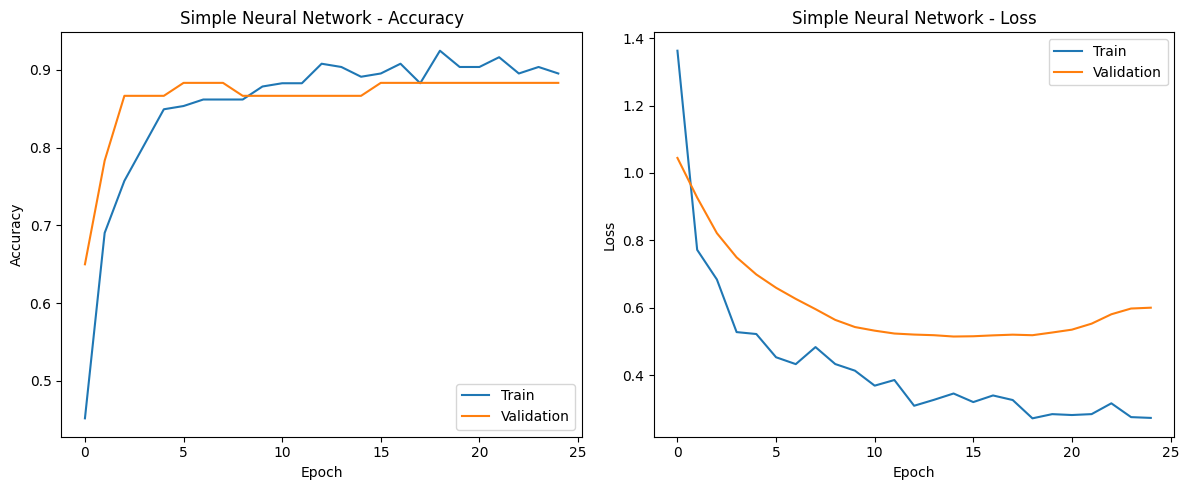

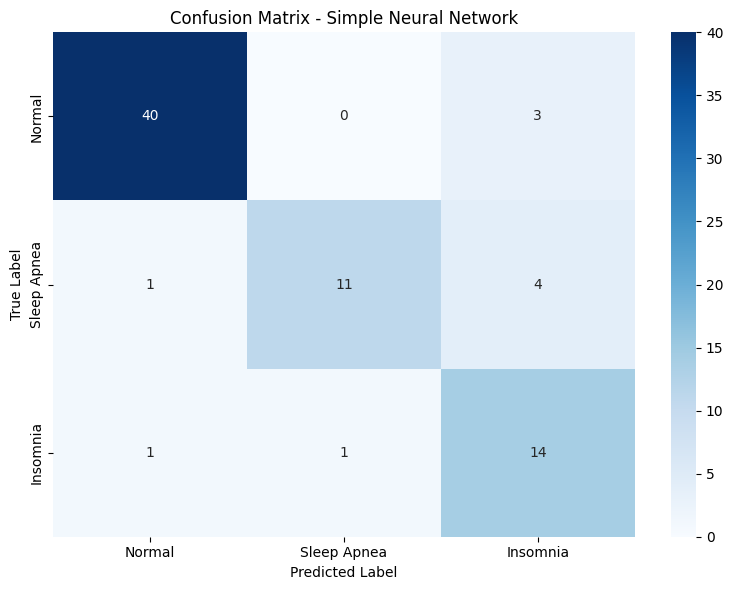

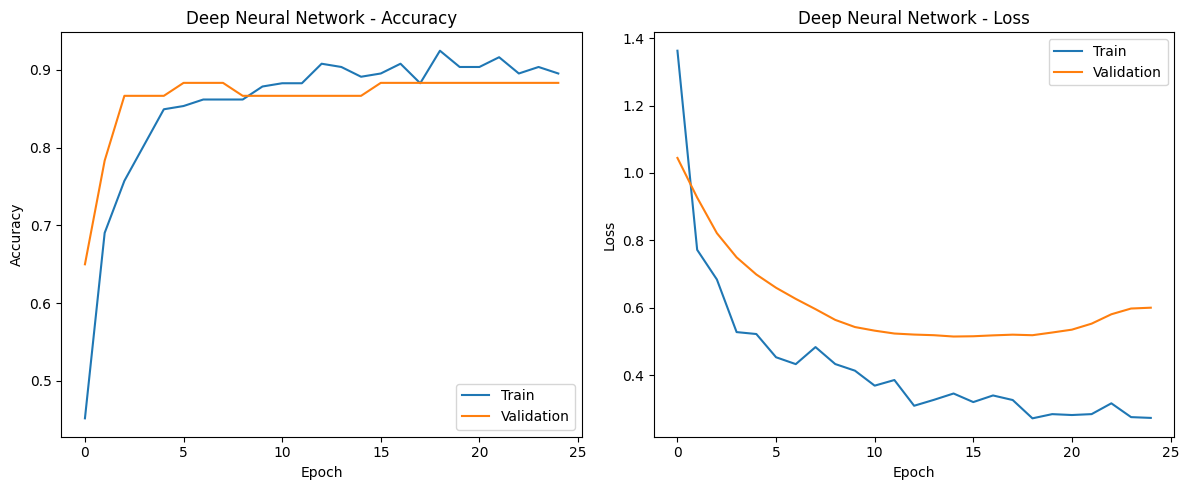

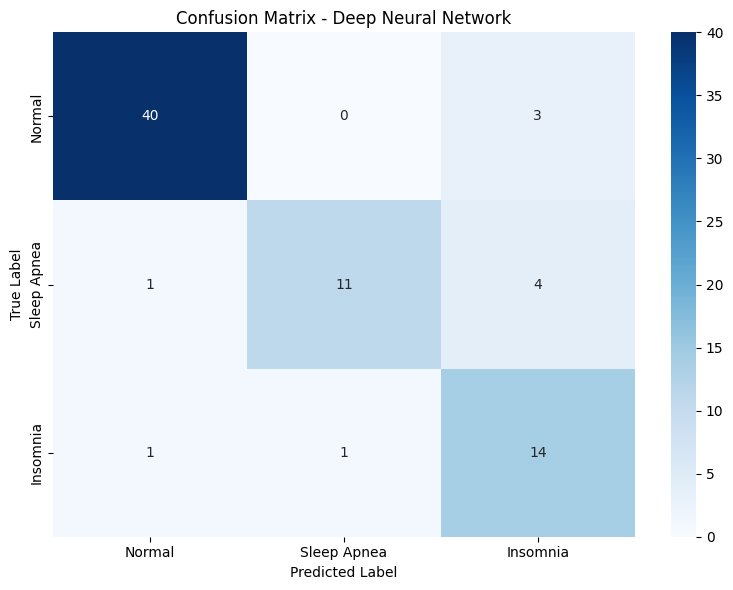

In [ ]:
# Plot training history for each model
for name, model in models.items():
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{name} - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{name} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Sleep Apnea', 'Insomnia'],
                yticklabels=['Normal', 'Sleep Apnea', 'Insomnia'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


Analyzing feature importance...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


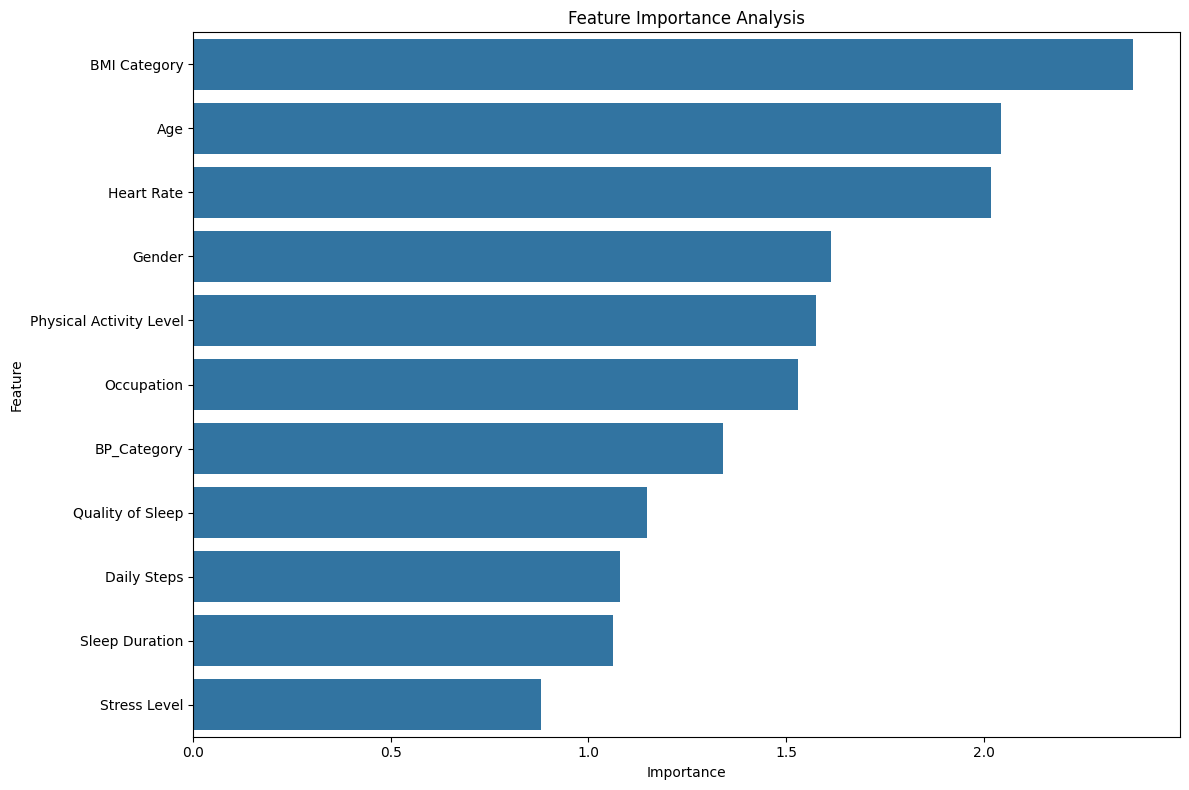


Feature Importance Ranking:
                    Feature  Importance
7              BMI Category    2.377931
1                       Age    2.044938
8                Heart Rate    2.019544
0                    Gender    1.614578
5   Physical Activity Level    1.576530
2                Occupation    1.530064
10              BP_Category    1.340284
4          Quality of Sleep    1.148691
9               Daily Steps    1.080369
3            Sleep Duration    1.062772
6              Stress Level    0.878635


In [ ]:
# ----------------------------------
# Feature Importance Analysis using a simpler model
# ----------------------------------
# We'll use a simple model with L1 regularization to estimate feature importance

print("\nAnalyzing feature importance...")
feature_importance_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],),
                kernel_regularizer=keras.regularizers.l1(0.01)),
    layers.Dense(3, activation='softmax')
])

feature_importance_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

feature_importance_model.fit(
    X_train_scaled, y_train_cat,
    epochs=50,
    batch_size=16,
    verbose=0
)

# Get the weights from the first layer
weights = feature_importance_model.layers[0].get_weights()[0]
importance = np.sum(np.abs(weights), axis=1)

# Create feature importance DataFrame
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Analysis')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(importance_df)

In [ ]:
best_model_name = evaluation_df.loc[evaluation_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nSaving the best model: {best_model_name}")
best_model.save('sleep_disorder_prediction_model.h5')
print("Model saved as 'sleep_disorder_prediction_model.h5'")


Saving the best model: Simple Neural Network
Model saved as 'sleep_disorder_prediction_model.h5'


In [ ]:
 nnprint("\nExample prediction with the best model:")
# Create a sample input
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)

# Make prediction
prediction_prob = best_model.predict(sample_scaled)
prediction_class = np.argmax(prediction_prob, axis=1)[0]

# Map prediction to class name
disorder_map = {0: 'Normal', 1: 'Sleep Apnea', 2: 'Insomnia'}
predicted_disorder = disorder_map[prediction_class]

print("Sample input features:", sample.values)
print("Prediction probabilities:", prediction_prob[0])
print(f"Predicted sleep disorder: {predicted_disorder} (class {prediction_class})")
print(f"Actual sleep disorder class: {y_test.iloc[0]} ({disorder_map[y_test.iloc[0]]})")


Example prediction with the best model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Sample input features: [[0.0e+00 5.3e+01 2.0e+00 8.5e+00 9.0e+00 3.0e+01 3.0e+00 0.0e+00 6.5e+01
  5.0e+03 3.0e+00]]
Prediction probabilities: [0.9534675  0.0168746  0.02965789]
Predicted sleep disorder: Normal (class 0)
Actual sleep disorder class: 0 (Normal)


In [ ]:
import tensorflowjs as tfjs
#TFJS
tfjs_target_dir = 'tfjs_model/'
tfjs.converters.save_keras_model(model, tfjs_target_dir)
print(f"> TFJS model tersimpan di folder: {tfjs_target_dir}/")

In [ ]:
import shutil
shutil.make_archive('saved_model_eye', 'zip', 'saved_model_eye')

In [ ]:
import shutil
shutil.make_archive('tfjs_model', 'zip', 'tfjs_model')

In [ ]:
import shutil
shutil.make_archive('tflite', 'zip', 'tflite')